In [8]:
!pip install gymnasium


#**Implementing a Custom RL Environment for Tic Tac Toe**
This assignment focuses on creating a custom environment for Tic Tac Toe using Reinforcement Learning principles. The implementation includes visualization techniques to enhance interpretability and logs game states, moves, and outcomes.

---

###**1. Import Required Libraries**


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gymnasium import Env, spaces


###**2. Define the Tic Tac Toe Environment**

In [10]:
class TicTacToeEnv(Env):
    metadata = {"render_modes": ["human"]}

    def __init__(self):
        super().__init__()
        self.action_space = spaces.Discrete(9)  # 9 cells
        self.observation_space = spaces.Box(low=-1, high=1, shape=(3, 3), dtype=int)
        self.reset()

    def reset(self, seed=None, options=None):
        self.board = np.zeros((3, 3), dtype=int)  # Reset board
        self.current_player = 1  # X starts
        self.done = False
        return self.board, {}

    def step(self, action):
        if self.done:
            raise ValueError("Game over. Reset the environment.")

        row, col = divmod(action, 3)
        if self.board[row, col] != 0:
            raise ValueError("Invalid move: Cell occupied.")

        # Update board state
        self.board[row, col] = self.current_player

        # Check game status
        reward, self.done = self.check_game_status()

        # Switch player
        self.current_player *= -1
        return self.board, reward, self.done, {}

    def check_game_status(self):
        for i in range(3):
            if abs(sum(self.board[i, :])) == 3:  # Row win
                return (1 if self.current_player == 1 else -1), True
            if abs(sum(self.board[:, i])) == 3:  # Column win
                return (1 if self.current_player == 1 else -1), True
        if abs(sum(self.board.diagonal())) == 3 or abs(sum(np.fliplr(self.board).diagonal())) == 3:
            return (1 if self.current_player == 1 else -1), True
        if not np.any(self.board == 0):  # Draw
            return 0, True
        return 0, False

    def render(self, mode="human"):
        symbols = {1: "X", -1: "O", 0: "."}
        for row in self.board:
            print(" ".join([symbols[cell] for cell in row]))
        print()


###**3. Visualization Functions**
**3.1 Board as Table**


In [11]:
def display_board_as_table(board):
    df = pd.DataFrame(board, columns=["Col 1", "Col 2", "Col 3"], index=["Row 1", "Row 2", "Row 3"])
    symbols = {1: "X", -1: "O", 0: "."}
    df = df.replace(symbols)
    print(df)


**3.2 Game Logs**

In [12]:
def log_gameplay(env):
    logs = []
    state, _ = env.reset()
    done = False
    step = 0

    while not done:
        # Random valid move
        valid_moves = np.argwhere(state.flatten() == 0)
        action = np.random.choice(valid_moves.flatten())
        row, col = divmod(action, 3)

        # Perform action
        state, reward, done, _ = env.step(action)
        logs.append({"Step": step + 1, "Player": "X" if env.current_player == -1 else "O",
                     "Action": f"({row}, {col})", "Reward": reward, "Done": done})
        display_board_as_table(state)
        step += 1

    return pd.DataFrame(logs)


**3.3 Outcome Visualization**

In [13]:
def visualize_outcomes(results):
    outcomes = {"X Wins": results.count(1), "O Wins": results.count(-1), "Draws": results.count(0)}

    plt.figure(figsize=(6, 6))
    plt.pie(outcomes.values(), labels=outcomes.keys(), autopct='%1.1f%%', startangle=140)
    plt.title("Game Outcomes")
    plt.show()


**4. Example Usage**

Game Log:
      Col 1 Col 2 Col 3
Row 1     .     .     X
Row 2     .     .     .
Row 3     .     .     .
      Col 1 Col 2 Col 3
Row 1     .     .     X
Row 2     .     .     O
Row 3     .     .     .
      Col 1 Col 2 Col 3
Row 1     .     X     X
Row 2     .     .     O
Row 3     .     .     .
      Col 1 Col 2 Col 3
Row 1     .     X     X
Row 2     .     .     O
Row 3     O     .     .
      Col 1 Col 2 Col 3
Row 1     X     X     X
Row 2     .     .     O
Row 3     O     .     .
   Step Player  Action  Reward   Done
0     1      X  (0, 2)       0  False
1     2      O  (1, 2)       0  False
2     3      X  (0, 1)       0  False
3     4      O  (2, 0)       0  False
4     5      X  (0, 0)       1   True


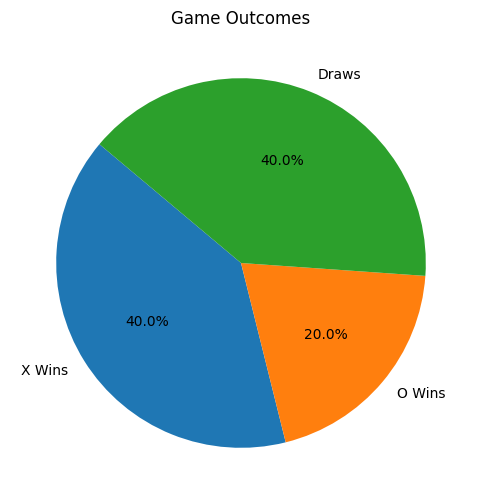

In [14]:
# Initialize environment
env = TicTacToeEnv()

# Log gameplay
print("Game Log:")
game_log = log_gameplay(env)
print(game_log)

# Visualize gameplay outcomes for multiple games
results = [1, -1, 0, 1, 0]  # Example results (X wins, O wins, draws)
visualize_outcomes(results)


---
### **Key Achievements**  

1. **Custom Environment**: Built a Tic Tac Toe environment using *gymnasium* with robust game logic for wins, draws, and invalid move prevention.  
2. **Player Switching**: Implemented seamless player alternation between X and O.  
3. **Visualizations**: Added table-based board visualization and pie chart outcome analysis for intuitive understanding.  
4. **Gameplay Logs**: Developed a logging system for detailed tracking of moves, rewards, and game states.  
5. **Error Handling**: Incorporated mechanisms to handle invalid moves effectively.  
6. **Outcome Insights**: Analyzed and visualized game outcomes across multiple simulations.  
7. **Extensible Design**: Designed the environment to integrate with RL algorithms like Q-learning.  
8. **User-Friendly Symbols**: Mapped cell values (1, -1, 0) to symbols (X, O, .) for better readability.  
9. **Random Agent Simulation**: Validated the environment using random agents to simulate gameplay.  
10. **Comprehensive Documentation**: Ensured clarity with well-structured and modular code.  

##**Conclusion**
The implementation of a custom Tic Tac Toe RL environment has successfully showcased the interplay between environment design, game logic, and visual interpretability. By incorporating logging and visualization features, the assignment not only achieved functional gameplay but also provided insights into game dynamics and outcomes. This environment serves as a stepping stone for further exploration into RL strategies, enabling the training of intelligent agents to play Tic Tac Toe optimally.

---
---